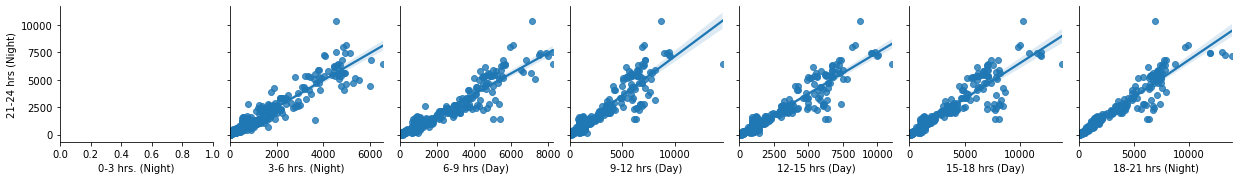

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the df
df = pd.read_csv("C:/Users/Saloni/Desktop/only_road_accidents_data3.csv")

X = df.iloc[:,2:9].values
y = df.iloc[:,9].values
pp=sns.pairplot(df,x_vars=['0-3 hrs. (Night)','3-6 hrs. (Night)','6-9 hrs (Day)','9-12 hrs (Day)','12-15 hrs (Day)','15-18 hrs (Day)','18-21 hrs (Night)'],
                  y_vars=['21-24 hrs (Night)'],kind='reg')
print(pp)
plt.savefig('1_pairplot.png', dpi=300, bbox_inches='tight')

In [2]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 0)

In [3]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

# Predicting the Test set results

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
print('coefficient of determination:',score)

#y=a0+ a1x1 +a2x2....a7x7
print('slope:',regressor.coef_)
print('intercept:',regressor.intercept_)

coefficient of determination: 0.9831726728479063
slope: [ 0.95377072 -0.05388771 -0.12513327 -0.23734929  0.09933494  0.31747461
  0.20402073]
intercept: -3.5794359619344505


In [4]:
arr=[]
while(1):
    arr1=[]
    a=str(input("Enter no of accidents in different time slot "))
    arr=a.split(",")
    for i in arr:
        arr1.append(int(i))
    print(arr1)
    print("Prediction of no of accidents in next time slot ")
    print(regressor.predict([arr1]))
    print("Do you want to continue ?")
    b=input()
    if(b=='NO'or b=='no'or b=='No'or b=='N'or b=='nO'):
        break

Enter no of accidents in different time slot 7,20,21,23,18,15,22
[7, 20, 21, 23, 18, 15, 22]
Prediction of no of accidents in next time slot 
[4.97097692]
Do you want to continue ?
no


coefficient of determination: 0.9900673218598293
coefficient of determination: 0.9905336733417974
coefficient of determination: 0.981511470328145
coefficient of determination: 0.9756864328386465
coefficient of determination: 0.9736364209481331


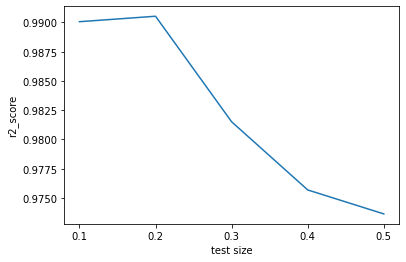

In [5]:
r2=[]
k=[0.1,0.2,0.3,0.4,0.5]

for i in k:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score=r2_score(y_test,y_pred)
    r2.append(score)
    print('coefficient of determination:',score)
plt.plot(k,r2)
plt.xticks(k)
plt.xlabel("test size")
plt.ylabel("r2_score")
plt.savefig("2_r2score.png")